  最近邻算法是一种用于分类和回归的非参数统计方法。输入包含特征空间（Feature Space）中的k个最接近的训练样本。
  在k-NN分类中，输出是一个分类族群。一个对象的分类是由其邻居的“多数表决”确定的，k个最近邻居（k为正整数，通常较小）中最常见的分类决定了赋予该对象的类别。若k = 1，则该对象的类别直接由最近的一个节点赋予。
  在k-NN回归中，输出是该对象的属性值。该值是其k个最近邻居的值的平均值。最近邻居法采用向量空间模型来分类，概念为相同类别的案例，彼此的相似度高，而可以借由计算与已知类别案例之相似度，来评估未知类别案例可能的分类。
  K-NN是一种基于实例的学习，或者是局部近似和将所有计算推迟到分类之后的惰性学习。
  无论是分类还是回归，衡量邻居的权重都非常有用，使较近邻居的权重比较远邻居的权重大。例如，一种常见的加权方案是给每个邻居权重赋值为1/ d，其中d是到邻居的距离
  邻居都取自一组已经正确分类（在回归的情况下，指属性值正确）的对象。虽然没要求明确的训练步骤，但这也可以当作是此算法的一个训练样本集。k-近邻算法的缺点是对数据的局部结构非常敏感。

### 无监督近邻算法

In [4]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# 构造二维数据
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# 中心点设置为2，三种算法可选 ['ball_tree', 'kd_tree', 'brute']
nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(X)

# 找到最近邻点
distances, indices = nbrs.kneighbors(X)

In [5]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [6]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

## 最近邻分类

In [8]:
%matplotlib inline

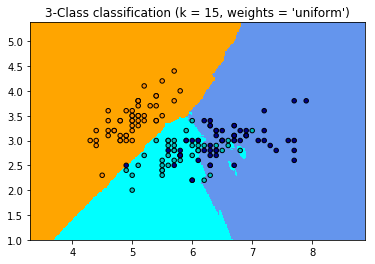

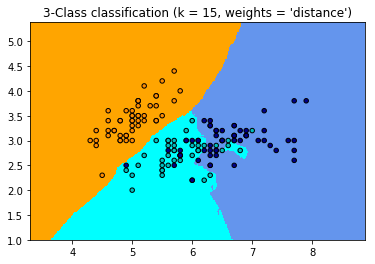

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# 使用经典的鸢尾属植物数据集，数据放在data文件下
iris = datasets.load_iris()

# 使用前两个列参数构造二维分类数据
X = iris.data[:, :2]
y = iris.target

h = .02  # 网格步长

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # 分类权重可以设置两种，uniform每个近邻分配统一的权重，distance分配权重与查询点的距离成反比
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # 绘制决策边界以及网格
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## 最近邻回归

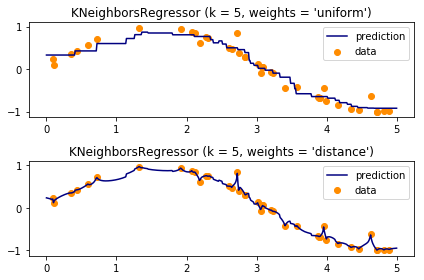

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# 加入随机噪点
y[::5] += 1 * (0.5 - np.random.rand(8))

# 设置中心点数量
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()